### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

# 1.5 Versión de las bibliotecas

In [1]:
import ads
import pandas as pd

In [3]:
ads.__version__

'2.6.8'

In [4]:
pd.__version__

'1.4.4'

In [5]:
datos = pd.read_csv('framingham.csv')
datos.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
638,1,51,1.0,0,0.0,0.0,0,0,0,250.0,125.0,80.0,26.98,67.0,108.0,0
4081,0,63,3.0,0,0.0,0.0,0,0,0,253.0,128.0,81.0,26.92,80.0,102.0,0
1511,0,38,2.0,0,0.0,0.0,0,0,0,255.0,125.0,85.0,23.05,72.0,73.0,0
421,1,44,1.0,0,0.0,NaN,0,0,1,190.0,122.0,81.0,36.12,70.0,143.0,0
3095,0,52,4.0,1,20.0,0.0,0,0,0,254.0,114.0,80.0,16.59,75.0,74.0,0


In [6]:
datos.shape

(4238, 16)

In [7]:
datos.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## 2.2 Cargando el CSV

In [8]:
from ads.dataset.factory import DatasetFactory

ds = DatasetFactory.open('framingham.csv') 

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
ds.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
type(ds)

ads.dataset.dataset.ADSDataset

In [12]:
type(datos)

pandas.core.frame.DataFrame

In [13]:
dict_ing_esp = {
    'male': 'sexo',
     'age': 'edad',
     'education': 'escolaridad',
     'currentSmoker': 'fumador',
     'cigsPerDay': 'cigarrillos_por_dia',                     
     'BPMeds': 'uso_medicamento_presion',
     'prevalentStroke': 'acv',
     'prevalentHyp': 'hipertension',
     'diabetes': 'diabetes',
     'totChol': 'colesterol_total',
     'sysBP': 'presion_arterial_sistolica',
     'diaBP': 'presion_arterial_diastolica',
     'BMI': 'imc',
     'heartRate': 'frecuencia_cardiaca',
     'glucose': 'glicemia',
     'TenYearCHD': 'riesgo_eac_decada'
}

In [14]:
# Renombrando las columnas
ds =ds.rename_columns(columns=dict_ing_esp)

# Mostrando el nombre de las columnas 
ds.columns

Index(['sexo', 'edad', 'escolaridad', 'fumador', 'cigarrillos_por_dia',
       'uso_medicamento_presion', 'acv', 'hipertension', 'diabetes',
       'colesterol_total', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glicemia',
       'riesgo_eac_decada'],
      dtype='object')

In [15]:
ds.head()

,sexo,edad,escolaridad,fumador,cigarrillos_por_dia,uso_medicamento_presion,acv,hipertension,diabetes,colesterol_total,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glicemia,riesgo_eac_decada
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [16]:
# Excluyendo la columna ‘escolaridad’ debido a que nosabemos el significado de estos datos
ds = ds.drop_columns('escolaridad')


# 2.3. Creando un ADS DataFrame

In [18]:
ds.summary()

,Feature,Datatype
0,sexo,categorical/int64
1,edad,ordinal/int64
2,fumador,categorical/int64
3,cigarrillos_por_dia,ordinal/float64
4,uso_medicamento_presion,categorical/float64
5,acv,categorical/int64
6,hipertension,categorical/int64
7,diabetes,categorical/int64
8,colesterol_total,ordinal/float64
9,presion_arterial_sistolica,continuous/float64


In [19]:
ds.cigarrillos_por_dia.unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [20]:
ds.isnull().sum()

sexo                             0
edad                             0
fumador                          0
cigarrillos_por_dia             29
uso_medicamento_presion         53
acv                              0
hipertension                     0
diabetes                         0
colesterol_total                50
presion_arterial_sistolica       0
presion_arterial_diastolica      0
imc                             19
frecuencia_cardiaca              1
glicemia                       388
riesgo_eac_decada                0
dtype: int64

In [21]:
# Creando un vector booleano (True y False) que posee 
#el valor True en las filas donde la columna ‘cigarrillos_por_dia’ no posee valores nulos
seleccion_correctos = ds.cigarrillos_por_dia.notnull()

In [22]:
# Aplicando la selección de la variable seleccion_correctos al 
#DataFrame
ds = ds[seleccion_correctos]

In [23]:
# Realizando la selección de filas no nulas con notnull 
#de las columnas  ‘uso_medicamento_presion’, ‘colesterol_total’, 
#‘imc’ y ‘frecuencia_cardiaca’
ds = ds[ds.uso_medicamento_presion.notnull()]
ds = ds[ds.colesterol_total.notnull()]
ds = ds[ds.imc.notnull()]
ds = ds[ds.frecuencia_cardiaca.notnull()]

In [24]:
ds.isnull().sum()

sexo                             0
edad                             0
fumador                          0
cigarrillos_por_dia              0
uso_medicamento_presion          0
acv                              0
hipertension                     0
diabetes                         0
colesterol_total                 0
presion_arterial_sistolica       0
presion_arterial_diastolica      0
imc                              0
frecuencia_cardiaca              0
glicemia                       339
riesgo_eac_decada                0
dtype: int64

## 2.4. Tratamiento de datos faltantes

In [25]:
personas_con_diabetes = ds[ds.diabetes == 1]

In [26]:
personas_sin_diabetes = ds[ds.diabetes == 0]

In [27]:
personas_con_diabetes.glicemia.head()

37    225.0
44    215.0
56     55.0
66    202.0
96    126.0
Name: glicemia, dtype: float64

In [28]:
ds.glicemia.describe()

count    3749.000000
mean       81.883169
std        23.888039
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glicemia, dtype: float64

In [29]:
ds.diabetes.value_counts(normalize=True)

0    0.97456
1    0.02544
Name: diabetes, dtype: float64

In [30]:
import seaborn as sns

(0.0, 400.0)

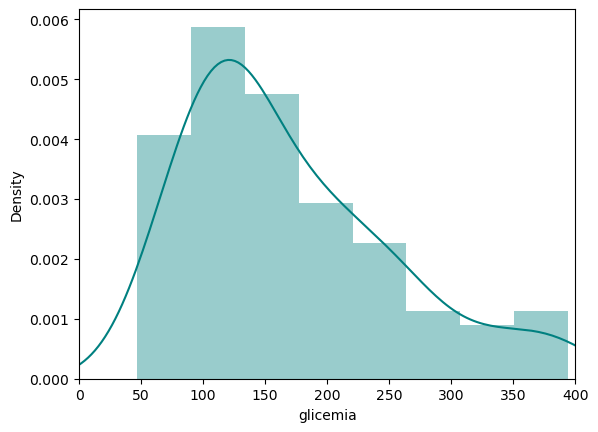

In [32]:
ax = sns.distplot(personas_con_diabetes.glicemia, norm_hist=False)
ax.set_xlim(0,400)

In [34]:
#seleccionar los datos nulos
nulos = ds.glicemia.isnull()

In [36]:
# Seleccionando las filas con valores nulos de glicemia en la
#columna ‘diabetes’ y  contando los datos
ds[nulos].diabetes.value_counts()

0    337
1      2
Name: diabetes, dtype: int64

In [39]:
#vemos que personas sin diabetes es la mayoría por lo cual el promedio puede 
#ser aplicado sin ningun problema
ds.fillna({'glicemia':81.8}, inplace= True)